## Observations and Insights 

There are 2 drug regimens that stand out as more effective, Capomulin and Ramicane.
The bar graph shows that Capomulin and Ramicane had the most number of mice tested.
The heavier the mouse, the less effective the drug is.


In [329]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

full_data= pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview

full_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [98]:
# Checking the number of mice.
print('The number of unique mice ID is:')
full_data["Mouse ID"].nunique()

The number of unique mice ID is:


249

In [99]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = full_data[full_data.duplicated(subset=["Mouse ID","Timepoint"])]


In [100]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [190]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = full_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [191]:
# Checking the number of mice in the clean DataFrame.
print('The new number of unique mice ID is:')
clean_data["Mouse ID"].nunique()

The new number of unique mice ID is:


249

## Summary Statistics

In [192]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats=pd.DataFrame(columns=['Mean', 'Median', 'Variance', 'Standard deviation','SEM'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_stats['Mean']=clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
summary_stats['Median']=clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
summary_stats['Variance']=clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
summary_stats['Standard deviation']=clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
summary_stats['SEM']=clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.

summary_stats

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [193]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats1=clean_data.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean','median', 'var', 'std','sem']})
summary_stats1

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

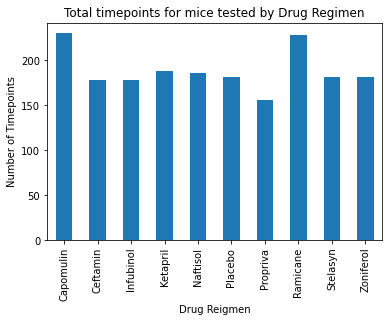

In [194]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints= clean_data.groupby('Drug Regimen')
timepoints_total= timepoints['Timepoint'].count()

timepoint_chart = timepoints_total.plot(kind='bar')

plt.title("Total timepoints for mice tested by Drug Regimen")
timepoint_chart.set_xlabel("Drug Reigmen")
timepoint_chart.set_ylabel("Number of Timepoints")

plt.show()

Text(0, 0.5, 'Number of Timepoints')

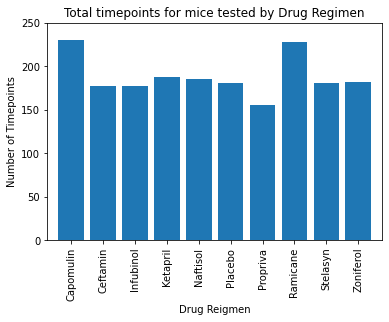

In [195]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(timepoints_total))

plt.bar(x_axis, timepoints_total, align = "center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation=90)

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(timepoints_total)+20)

plt.title("Total timepoints for mice tested by Drug Regimen")
plt.xlabel("Drug Reigmen")
plt.ylabel("Number of Timepoints")

In [196]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_male=clean_data[['Mouse ID', 'Sex']].groupby('Sex').count()
female_male
                      

,Mouse ID
Sex,
Female,930
Male,958


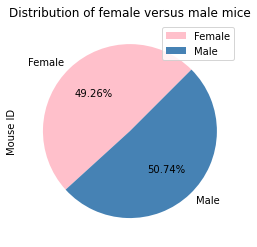

In [197]:
chart = female_male.plot.pie(y = 'Mouse ID', colors = ['pink', 'steelblue'],startangle=45,autopct='%1.2f%%',title=('Distribution of female versus male mice'))
                            

Text(0.5, 1.0, 'Distribution of female versus male mice')

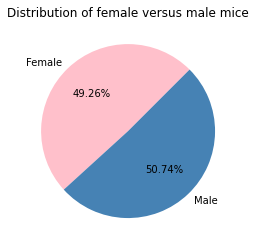

In [201]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_male

sex = ['Female','Male']
count = ['930','958']
colors = ['pink', 'steelblue']

plt.pie(count, labels=sex, colors=colors,
        startangle=45,autopct="%1.2f%%")
plt.title('Distribution of female versus male mice')

## Quartiles, Outliers and Boxplots

In [208]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=clean_data.groupby(['Mouse ID'], as_index=False)['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint= pd.merge(last_timepoint,clean_data,on=["Mouse ID","Timepoint"],how="left")
last_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [252]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Slice the main df and leave only the 4 main drugs
sliced_drugs = last_timepoint.loc[last_timepoint['Drug Regimen'].isin(drug_list)]

# New df created
tumor_df=pd.DataFrame(columns=drug_list)

# Create empty list to fill with tumor vol data (for plotting)
treatments=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor_df[drug] = (sliced_drugs[sliced_drugs['Drug Regimen']==drug]['Tumor Volume (mm3)']).reset_index(drop=True)
    
    
    # Determine outliers using upper and lower bounds
    quartiles = round(tumor_df[drug].quantile([.25,.5,.75]), 2)
    low_q = round(quartiles[0.25], 2)
    up_q = round(quartiles[0.75], 2)
    iqr = round(up_q - low_q, 2)
    
    low_bound = round(low_q - (1.5*iqr), 2)
    up_bound = round(up_q + (1.5*iqr), 2)
    
    # Update list
    treatments.append([drug, low_q, up_q, iqr, low_bound, up_bound])
    
    # Print out info
    print(f"{drug}")
    print(f"__________")
    print(f"Lower quartile: {low_q}")
    print(f"Upper quartile: {up_q}")
    print(f"Inter quartile: {iqr}")
    print(f"Lower bound: {low_bound}")
    print(f"Upper bound: {up_bound}\n")

Capomulin
__________
Lower quartile: 32.38
Upper quartile: 40.16
Inter quartile: 7.78
Lower bound: 20.71
Upper bound: 51.83

Ramicane
__________
Lower quartile: 31.56
Upper quartile: 40.66
Inter quartile: 9.1
Lower bound: 17.91
Upper bound: 54.31

Infubinol
__________
Lower quartile: 54.05
Upper quartile: 65.53
Inter quartile: 11.48
Lower bound: 36.83
Upper bound: 82.75

Ceftamin
__________
Lower quartile: 48.72
Upper quartile: 64.3
Inter quartile: 15.58
Lower bound: 25.35
Upper bound: 87.67



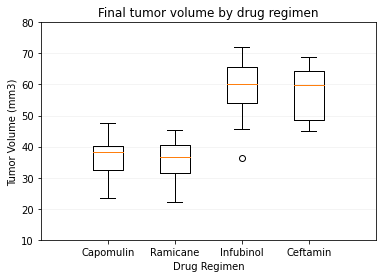

In [275]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax = plt.subplots()
ax.set_title('Final tumor volume by drug regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')

ax.boxplot(tumor_df, labels= drug_list)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.3)

plt.xlim(0, 5)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

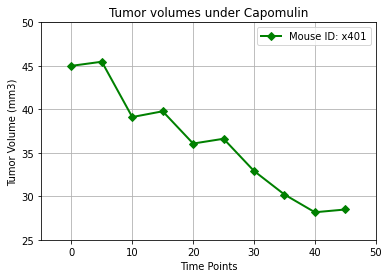

In [302]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse_id=clean_data.loc[clean_data["Drug Regimen"]=="Capomulin",:].iloc[15]['Mouse ID']
cap_tumors_df=clean_data[clean_data['Mouse ID']==cap_mouse_id][['Timepoint','Tumor Volume (mm3)']]

x_axis = cap_tumors_df['Timepoint']
y_axis = cap_tumors_df['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis, linewidth=2, markersize=5, marker="D", color="green", label=f"Mouse ID: {cap_mouse_id}")

plt.xlabel("Time Points")
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor volumes under Capomulin')

plt.legend()
plt.xlim(-5,50)
plt.ylim(25,50)
plt.grid()
plt.show()

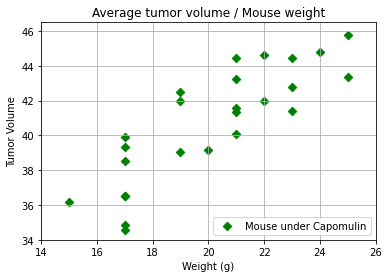

In [357]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_only_df = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin",:]
cap_avg_df = cap_only_df.groupby(['Mouse ID']).mean()

plt.scatter(cap_avg_df['Weight (g)'],cap_avg_df['Tumor Volume (mm3)'], marker='D', color="green", alpha=1, label="Mouse under Capomulin")

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume')
plt.title('Average tumor volume / Mouse weight')

plt.legend(loc='lower right')
plt.xlim(14, 26)
plt.ylim(34, 46.5)
plt.grid()
plt.show()

## Correlation and Regression

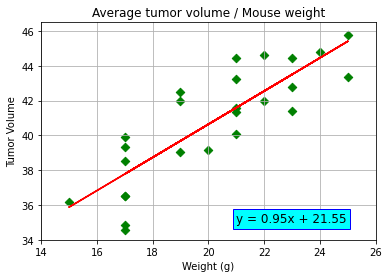

Correlation: 0.84
R-squared: 0.71
Regression line: y = 0.95x + 21.55


In [359]:
# Calculate the correlation coefficient and linear regression model 
x = cap_avg_df['Weight (g)']
y = cap_avg_df['Tumor Volume (mm3)']

correlation = st.pearsonr(x, y)

(slope, intercept, r, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept

line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.scatter(x, y, marker='D', color="green", alpha=1,)

plt.plot(x,regress,"r-")
plt.annotate(line_eq,(21,35), fontsize=12, color="black", bbox=dict(boxstyle="square,pad=0.3", fc="cyan", ec="b", lw=1))
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume')
plt.title('Average tumor volume / Mouse weight')

plt.xlim(14, 26)
plt.ylim(34, 46.5)
plt.grid()

plt.show()

print(f"Correlation: {round(correlation[0],2)}")
print(f"R-squared: {round(r**2, 2)}")
print(f"Regression line: {line_eq}")
